<a href="https://colab.research.google.com/github/KanyinTolulope/A2D-Gallery/blob/master/Hamoye_DS_Practise_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np



In [6]:
import pandas as pd 

In [7]:
df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [8]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

In [9]:
df = df.rename(columns=column_names)

In [10]:
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

In [11]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


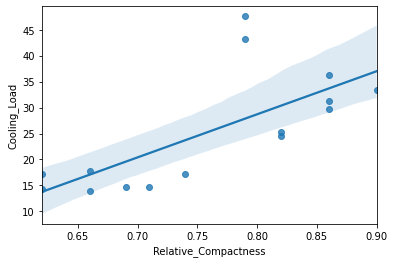

In [12]:
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load",
data=simple_linear_reg_df)

In [14]:
#Firstly, we normalise our dataset to a common scale using the min max scaler 
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns) 
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load']) 
heating_target = normalised_df['Heating_Load'] 

In [15]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables. 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1) 

In [16]:
#Now, we import LinearRegression from sklearn.linear_model 
from sklearn.linear_model import LinearRegression 

In [17]:
linear_model = LinearRegression() 

In [18]:
#fit the model to the training dataset
linear_model.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
#obtain predictions
predicted_values = linear_model.predict(x_test) 

In [20]:
#MAE
from sklearn.metrics import mean_absolute_error

In [21]:
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.063

In [22]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) 

1.823

In [23]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.089

In [24]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.893

In [25]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [26]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name): 
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [32]:
linear_model_weights = get_weights_df(model, x_train, 'Linear_Model_Weight') 
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight') 

NameError: ignored

In [33]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

NameError: ignored